In [70]:
import glob

import pandas as pd
import numpy as np
import bagpy
from bagpy import bagreader

### Read all the bagfiles in the specified directory and create CSV files

In [71]:
bagfiles_path = 'bagdirs/rosbags-spike-time1/'
# print all topics in a bag file
files = glob.glob(bagfiles_path+'/*.bag')
files.sort()
len(files)

40

In [ ]:
# for file in files:
#     b = bagreader(file)
#     print(b.topic_table)

In [72]:
for file in files:
    b = bagreader(file)
    csvfiles = []
    for t in b.topics:
        data = b.message_by_topic(t)
        csvfiles.append(data)


[INFO]  Data folder bagdirs/rosbags-spike-time1/data_2023-10-05-21-04-22 already exists. Not creating.
[INFO]  Data folder bagdirs/rosbags-spike-time1/data_2023-10-05-21-05-44 already exists. Not creating.
[INFO]  Data folder bagdirs/rosbags-spike-time1/data_2023-10-05-21-07-06 already exists. Not creating.
[INFO]  Data folder bagdirs/rosbags-spike-time1/data_2023-10-05-21-08-28 already exists. Not creating.
[INFO]  Data folder bagdirs/rosbags-spike-time1/data_2023-10-05-21-09-51 already exists. Not creating.
[INFO]  Data folder bagdirs/rosbags-spike-time1/data_2023-10-05-21-11-13 already exists. Not creating.
[INFO]  Data folder bagdirs/rosbags-spike-time1/data_2023-10-05-21-12-35 already exists. Not creating.
[INFO]  Data folder bagdirs/rosbags-spike-time1/data_2023-10-05-21-13-57 already exists. Not creating.
[INFO]  Data folder bagdirs/rosbags-spike-time1/data_2023-10-05-21-15-19 already exists. Not creating.
[INFO]  Data folder bagdirs/rosbags-spike-time1/data_2023-10-05-21-16-42 

### Get only bag files with fault effects

In [73]:
# get all the record.csv files from each subfolder in the rosbags folder
rfiles = glob.glob(bagfiles_path+'*/record.csv')
rfiles.sort()

df_recall_fe = pd.DataFrame()
df_recall = pd.DataFrame()
for i, f in enumerate(rfiles):
    df_rec = pd.read_csv(f)
    fail_count = df_rec['failure_type.data'].value_counts()
    # df_recall = pd.concat([df_recall, df_rec], ignore_index=True)
    if fail_count.shape[0] > 1:
        df_recall_fe = pd.concat([df_recall_fe, df_rec], ignore_index=True)

df_recall_fe

,Time,joint_states.header.seq,joint_states.header.stamp.secs,joint_states.header.stamp.nsecs,joint_states.header.frame_id,joint_states.name,joint_states.position,joint_states.velocity,joint_states.effort,action.data,fault_flag.data,planner_flag.data,failure_type.data
0,102.610,162,102,579000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.0001651136005458298, -0.7851069647150393, -...","(-0.0048498676889353175, 0.004529107765218051,...","(0.18245438964111313, 3.732295095860321, 0.741...",1,0,0,0
1,102.630,163,102,612000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.00016353636730048748, -0.7844315818250367, ...","(-0.005219100607786735, 0.014414861782520064, ...","(0.22844412802913544, 3.6785227166289545, 0.76...",1,0,0,0
2,102.650,164,102,645000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.00014475257243695694, -0.7833405103954441,...","(-0.006272740519306961, 0.04424589555892306, -...","(-0.15178833651756635, 3.348962468546997, 0.78...",1,0,0,0
3,102.671,164,102,645000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.00014475257243695694, -0.7833405103954441,...","(-0.006272740519306961, 0.04424589555892306, -...","(-0.15178833651756635, 3.348962468546997, 0.78...",1,0,0,0
4,102.690,165,102,679000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.00016369896957790786, -0.7819360997517144,...","(-0.005611866719507768, 0.037231465352648735, ...","(0.23545975475149816, 3.701103204192416, 0.742...",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17779,124.511,825,124,479000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.458985346334968, -0.20639364467029786, 0.4...","(-0.004557920370293266, -0.006467431226882314,...","(-0.3342201588536855, 19.09515518691807, 2.633...",9,0,0,0
17780,124.530,826,124,512000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.459201158813312, -0.2066222990260549, 0.40...","(0.00790474809308158, 0.0030789936114556287, -...","(-0.2992130055792502, 19.10577470993114, 2.676...",9,0,0,0
17781,124.551,827,124,545000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.45913933248647076, -0.2065464474016565, 0....","(0.001540540985201682, 0.007554602801733005, 0...","(0.26488957268577334, 19.728814809808352, 2.33...",9,0,0,0
17782,124.570,827,124,545000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.45913933248647076, -0.2065464474016565, 0....","(0.001540540985201682, 0.007554602801733005, 0...","(0.26488957268577334, 19.728814809808352, 2.33...",9,0,0,0


In [74]:
# check the number of failure types
df_recall_fe['failure_type.data'].value_counts()

failure_type.data
0    17069
1      457
4      252
5        6
Name: count, dtype: int64

In [75]:
# save the dataframe to csv file
df_recall_fe.to_csv('spike_time_1.csv', index=False)

### Shift the data by certain time

In [115]:
# get all the record.csv files from each subfolder in the rosbags folder
rfiles = glob.glob(bagfiles_path+'*/record.csv')
rfiles.sort()

df_recall_fe = pd.DataFrame()
df_recall = pd.DataFrame()
for i, f in enumerate(rfiles):
    df_rec = pd.read_csv(f)
    # shift the failure_type.data values by 10 rows down
    shift_by = -10
    df_rec['failure_type.data'] = df_rec['failure_type.data'].shift(shift_by)
    # drop the last 10 rows
    df_rec = df_rec[:shift_by]
    fail_count = df_rec['failure_type.data'].value_counts()
    # df_recall = pd.concat([df_recall, df_rec], ignore_index=True)
    if fail_count.shape[0] > 1:
        df_recall_fe = pd.concat([df_recall_fe, df_rec], ignore_index=True)

df_recall_fe

,Time,joint_states.header.seq,joint_states.header.stamp.secs,joint_states.header.stamp.nsecs,joint_states.header.frame_id,joint_states.name,joint_states.position,joint_states.velocity,joint_states.effort,action.data,fault_flag.data,planner_flag.data,failure_type.data
0,102.610,162,102,579000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.0001651136005458298, -0.7851069647150393, -...","(-0.0048498676889353175, 0.004529107765218051,...","(0.18245438964111313, 3.732295095860321, 0.741...",1,0,0,0.0
1,102.630,163,102,612000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.00016353636730048748, -0.7844315818250367, ...","(-0.005219100607786735, 0.014414861782520064, ...","(0.22844412802913544, 3.6785227166289545, 0.76...",1,0,0,0.0
2,102.650,164,102,645000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.00014475257243695694, -0.7833405103954441,...","(-0.006272740519306961, 0.04424589555892306, -...","(-0.15178833651756635, 3.348962468546997, 0.78...",1,0,0,0.0
3,102.671,164,102,645000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.00014475257243695694, -0.7833405103954441,...","(-0.006272740519306961, 0.04424589555892306, -...","(-0.15178833651756635, 3.348962468546997, 0.78...",1,0,0,0.0
4,102.690,165,102,679000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.00016369896957790786, -0.7819360997517144,...","(-0.005611866719507768, 0.037231465352648735, ...","(0.23545975475149816, 3.701103204192416, 0.742...",1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17639,124.311,819,124,279000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.4478229974176404, -0.1990244564455974, 0.4...","(-0.08612994572352681, -0.04621128069772222, 0...","(0.2427686866331584, 20.483124482792157, 2.216...",9,0,0,0.0
17640,124.330,820,124,312000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.45075131344401953, -0.20073068649803005, 0...","(-0.07850017256465577, -0.04463296090371087, 0...","(0.18689959467340453, 20.31325405430738, 2.180...",9,0,0,0.0
17641,124.351,821,124,346000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.4532302172500984, -0.2022698881799343, 0.4...","(-0.07527570135035436, -0.05056862196003075, 0...","(-0.14478698782963362, 20.007836176927857, 2.4...",9,0,0,0.0
17642,124.369,821,124,346000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.4532302172500984, -0.2022698881799343, 0.4...","(-0.07527570135035436, -0.05056862196003075, 0...","(-0.14478698782963362, 20.007836176927857, 2.4...",9,0,0,0.0


In [116]:
# check the number of failure types
df_recall_fe['failure_type.data'].value_counts()

failure_type.data
0.0    16929
1.0      457
4.0      252
5.0        6
Name: count, dtype: int64

In [117]:
# save the dataframe to csv file
# df_recall_fe.to_csv('shifted_spike_time_1.csv', index=False)

#### Random test for shifting

In [102]:
# get all the record.csv files from each subfolder in the rosbags folder
rfiles = glob.glob(bagfiles_path+'*/record.csv')
rfiles.sort()

df_test = pd.read_csv(rfiles[5])

# print all the rows where failure_type.data and planner_flag.data is not 0
# df_test[(df_test['planner_flag.data'] != 0)]
df_test[(df_test['failure_type.data'] != 0)]

,Time,joint_states.header.seq,joint_states.header.stamp.secs,joint_states.header.stamp.nsecs,joint_states.header.frame_id,joint_states.name,joint_states.position,joint_states.velocity,joint_states.effort,action.data,fault_flag.data,planner_flag.data,failure_type.data
736,117.330,604,117,312000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.31474953806429706, -0.06825954559160063, 0....","(-0.009635950291479222, -5.3513117821309825e-0...","(-0.08620292926775537, 28.62779523039756, -0.4...",6,1,0,1
737,117.350,605,117,345000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.31466489447033474, -0.06835019714268675, 0....","(-0.001797809996258819, -0.00433591045218161, ...","(-0.166774943164045, 27.94045824288611, -0.533...",6,1,0,1
738,117.370,605,117,345000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.31466489447033474, -0.06835019714268675, 0....","(-0.001797809996258819, -0.00433591045218161, ...","(-0.166774943164045, 27.94045824288611, -0.533...",6,1,0,1
739,117.390,606,117,379000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.31480173351363394, -0.06850780277623425, 0....","(0.014589832808749547, 0.0010114098962616688, ...","(-0.6795586911370751, 26.976177352324726, -0.0...",6,1,0,1
740,117.410,606,117,379000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.31480173351363394, -0.06850780277623425, 0....","(0.014589832808749547, 0.0010114098962616688, ...","(-0.6795586911370751, 26.976177352324726, -0.0...",6,1,0,1
741,117.430,607,117,412000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.3151456227881715, -0.06836301605382111, 0.0...","(0.021435890854206108, 0.015043830151005686, -...","(-0.6061429486784231, 26.732475743175158, -0.0...",6,1,0,1
742,117.451,608,117,445000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.31581460734243727, -0.06753223778368778, 0....","(0.018997006205703226, 0.03265336982393263, 0....","(0.18181426908704373, 27.375920735081433, -0.2...",6,1,0,1
743,117.471,608,117,445000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.31581460734243727, -0.06753223778368778, 0....","(0.018997006205703226, 0.03265336982393263, 0....","(0.18181426908704373, 27.375920735081433, -0.2...",6,1,0,1
744,117.489,609,117,479000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.3165576917814663, -0.06618082952487025, 0.0...","(0.018504070483397222, 0.04638968498326297, 0....","(0.5184250634005836, 28.143703184830585, 0.157...",6,1,0,1
745,117.512,609,117,479000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.3165576917814663, -0.06618082952487025, 0.0...","(0.018504070483397222, 0.04638968498326297, 0....","(0.5184250634005836, 28.143703184830585, 0.157...",6,1,0,1


In [111]:
df_test = pd.read_csv(rfiles[5])

# shift the failure_type.data values by 10 rows down
shift_by = -10
df_test['failure_type.data'] = df_test['failure_type.data'].shift(shift_by)
# drop the last 10 rows
df_test = df_test[:shift_by]
df_test[(df_test['failure_type.data'] != 0)]

,Time,joint_states.header.seq,joint_states.header.stamp.secs,joint_states.header.stamp.nsecs,joint_states.header.frame_id,joint_states.name,joint_states.position,joint_states.velocity,joint_states.effort,action.data,fault_flag.data,planner_flag.data,failure_type.data
726,117.130,598,117,112000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.31643092578559795, -0.06830440620780998, 0....","(0.014794305573835159, 0.002478234804353928, -...","(0.882223889584668, 28.5372398891518, 1.523715...",5,1,0,1.0
727,117.150,599,117,145000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.31645194073918237, -0.06832361802897502, 0....","(0.0012288761973945025, 0.002430933065847444, ...","(0.7698990358477387, 28.50083148237445, 1.2469...",5,1,0,1.0
728,117.170,599,117,145000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.31645194073918237, -0.06832361802897502, 0....","(0.0012288761973945025, 0.002430933065847444, ...","(0.7698990358477387, 28.50083148237445, 1.2469...",5,1,0,1.0
729,117.191,600,117,179000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.31611517193642236, -0.06832654845882136, 0....","(-0.018303844568730257, -0.003523632593215512,...","(0.36239321124996204, 28.682611266232634, 0.70...",5,1,0,1.0
730,117.210,600,117,179000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.31611517193642236, -0.06832654845882136, 0....","(-0.018303844568730257, -0.003523632593215512,...","(0.36239321124996204, 28.682611266232634, 0.70...",6,1,0,1.0
731,117.230,601,117,212000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.31611517193642236, -0.06832654845882136, 0....","(-0.018303844568730257, -0.003523632593215512,...","(0.36239321124996204, 28.682611266232634, 0.70...",6,1,1,1.0
732,117.249,602,117,245000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.3156313040296457, -0.06830774629487468, 0.0...","(-0.007387561191538913, 0.003907620258087814, ...","(-0.11157838483840697, 28.575635061178346, 0.5...",6,1,0,1.0
733,117.271,602,117,245000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.3156313040296457, -0.06830774629487468, 0.0...","(-0.007387561191538913, 0.003907620258087814, ...","(-0.11157838483840697, 28.575635061178346, 0.5...",6,1,0,1.0
734,117.291,603,117,279000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.3151185490294477, -0.06827854038542203, 0.0...","(-0.016564452192391405, 0.0014563413444063577,...","(0.02633804728816243, 28.81740106595251, -0.34...",6,1,0,1.0
735,117.310,603,117,279000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.3151185490294477, -0.06827854038542203, 0.0...","(-0.016564452192391405, 0.0014563413444063577,...","(0.02633804728816243, 28.81740106595251, -0.34...",6,1,0,1.0


### Process all record csv file

In [119]:
# df_st1 = pd.read_csv('shifted_spike_time_1.csv')
df_st1 = df_recall_fe
df_st1.head()

,Time,joint_states.header.seq,joint_states.header.stamp.secs,joint_states.header.stamp.nsecs,joint_states.header.frame_id,joint_states.name,joint_states.position,joint_states.velocity,joint_states.effort,action.data,fault_flag.data,planner_flag.data,failure_type.data
0,102.610,162,102,579000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.0001651136005458298, -0.7851069647150393, -...","(-0.0048498676889353175, 0.004529107765218051,...","(0.18245438964111313, 3.732295095860321, 0.741...",1,0,0,0.0
1,102.630,163,102,612000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(0.00016353636730048748, -0.7844315818250367, ...","(-0.005219100607786735, 0.014414861782520064, ...","(0.22844412802913544, 3.6785227166289545, 0.76...",1,0,0,0.0
2,102.650,164,102,645000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.00014475257243695694, -0.7833405103954441,...","(-0.006272740519306961, 0.04424589555892306, -...","(-0.15178833651756635, 3.348962468546997, 0.78...",1,0,0,0.0
3,102.671,164,102,645000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.00014475257243695694, -0.7833405103954441,...","(-0.006272740519306961, 0.04424589555892306, -...","(-0.15178833651756635, 3.348962468546997, 0.78...",1,0,0,0.0
4,102.690,165,102,679000000,NaN,"['panda_joint1', 'panda_joint2', 'panda_joint3...","(-0.00016369896957790786, -0.7819360997517144,...","(-0.005611866719507768, 0.037231465352648735, ...","(0.23545975475149816, 3.701103204192416, 0.742...",1,0,0,0.0


In [120]:
print(df_st1['planner_flag.data'].value_counts())
print(df_st1['fault_flag.data'].value_counts())

planner_flag.data
0    17428
1      216
Name: count, dtype: int64
fault_flag.data
0    16674
1      970
Name: count, dtype: int64


In [121]:
# drop the columns
# joint_states.header.seq, joint_states.header.stamp.secs,
# joint_states.header.stamp.nsecs, joint_states.header.frame_id, joint_states.name	
df_st1.drop(df_st1.columns[1:6], axis=1, inplace=True)
df_st1.head()

,Time,joint_states.position,joint_states.velocity,joint_states.effort,action.data,fault_flag.data,planner_flag.data,failure_type.data
0,102.610,"(0.0001651136005458298, -0.7851069647150393, -...","(-0.0048498676889353175, 0.004529107765218051,...","(0.18245438964111313, 3.732295095860321, 0.741...",1,0,0,0.0
1,102.630,"(0.00016353636730048748, -0.7844315818250367, ...","(-0.005219100607786735, 0.014414861782520064, ...","(0.22844412802913544, 3.6785227166289545, 0.76...",1,0,0,0.0
2,102.650,"(-0.00014475257243695694, -0.7833405103954441,...","(-0.006272740519306961, 0.04424589555892306, -...","(-0.15178833651756635, 3.348962468546997, 0.78...",1,0,0,0.0
3,102.671,"(-0.00014475257243695694, -0.7833405103954441,...","(-0.006272740519306961, 0.04424589555892306, -...","(-0.15178833651756635, 3.348962468546997, 0.78...",1,0,0,0.0
4,102.690,"(-0.00016369896957790786, -0.7819360997517144,...","(-0.005611866719507768, 0.037231465352648735, ...","(0.23545975475149816, 3.701103204192416, 0.742...",1,0,0,0.0


In [122]:
# appply eval() to convert string to list
df_st1["joint_states.position"] = df_st1["joint_states.position"].apply(
    lambda x: eval(x)
)
df_st1["joint_states.velocity"] = df_st1["joint_states.velocity"].apply(
    lambda x: eval(x)
)
df_st1["joint_states.effort"] = df_st1["joint_states.effort"].apply(lambda x: eval(x))


In [123]:
# convert joint_states columns to type list

df_st1[
    ["joint_states.position", "joint_states.velocity", "joint_states.effort"]
] = df_st1[
    ["joint_states.position", "joint_states.velocity", "joint_states.effort"]
].apply(
    lambda x: [np.float64(i) for i in x]
)
df_st1.head()


,Time,joint_states.position,joint_states.velocity,joint_states.effort,action.data,fault_flag.data,planner_flag.data,failure_type.data
0,102.610,"[0.0001651136005458298, -0.7851069647150393, -...","[-0.0048498676889353175, 0.004529107765218051,...","[0.18245438964111313, 3.732295095860321, 0.741...",1,0,0,0.0
1,102.630,"[0.00016353636730048748, -0.7844315818250367, ...","[-0.005219100607786735, 0.014414861782520064, ...","[0.22844412802913544, 3.6785227166289545, 0.76...",1,0,0,0.0
2,102.650,"[-0.00014475257243695694, -0.7833405103954441,...","[-0.006272740519306961, 0.04424589555892306, -...","[-0.15178833651756635, 3.348962468546997, 0.78...",1,0,0,0.0
3,102.671,"[-0.00014475257243695694, -0.7833405103954441,...","[-0.006272740519306961, 0.04424589555892306, -...","[-0.15178833651756635, 3.348962468546997, 0.78...",1,0,0,0.0
4,102.690,"[-0.00016369896957790786, -0.7819360997517144,...","[-0.005611866719507768, 0.037231465352648735, ...","[0.23545975475149816, 3.701103204192416, 0.742...",1,0,0,0.0


In [124]:
poscols = [f'joint_position_{i}' for i in range(9)]
velcols = [f'joint_velocity_{i}' for i in range(9)]
effcols = [f'joint_effort_{i}' for i in range(9)]

In [125]:
df_st1[poscols] = pd.DataFrame(
    df_st1["joint_states.position"].tolist(), index=df_st1.index
)
df_st1[velcols] = pd.DataFrame(
    df_st1["joint_states.velocity"].tolist(), index=df_st1.index
)
df_st1[effcols] = pd.DataFrame(
    df_st1["joint_states.effort"].tolist(), index=df_st1.index
)


In [126]:
# drop the old joint_states columns
df_st1.drop(
    ["joint_states.position", "joint_states.velocity", "joint_states.effort"],
    axis=1,
    inplace=True,
)
df_st1.head()


,Time,action.data,fault_flag.data,planner_flag.data,failure_type.data,joint_position_0,joint_position_1,joint_position_2,joint_position_3,joint_position_4,...,joint_velocity_8,joint_effort_0,joint_effort_1,joint_effort_2,joint_effort_3,joint_effort_4,joint_effort_5,joint_effort_6,joint_effort_7,joint_effort_8
0,102.610,1,0,0,0.0,0.000165,-0.785107,-0.000246,-2.355536,-0.000020,...,-0.000209,0.182454,3.732295,0.741004,-21.706804,-0.576970,-2.399762,-0.009026,-0.000526,-0.000526
1,102.630,1,0,0,0.0,0.000164,-0.784432,-0.000556,-2.355055,-0.000040,...,-0.000368,0.228444,3.678523,0.768415,-21.681241,-0.572200,-2.399005,-0.009826,-0.000400,-0.000400
2,102.650,1,0,0,0.0,-0.000145,-0.783341,-0.001045,-2.354337,-0.000061,...,-0.000759,-0.151788,3.348962,0.786640,-22.291896,-0.606744,-2.168622,0.006186,-0.000479,-0.000479
3,102.671,1,0,0,0.0,-0.000145,-0.783341,-0.001045,-2.354337,-0.000061,...,-0.000759,-0.151788,3.348962,0.786640,-22.291896,-0.606744,-2.168622,0.006186,-0.000479,-0.000479
4,102.690,1,0,0,0.0,-0.000164,-0.781936,-0.001709,-2.353491,-0.000118,...,-0.000811,0.235460,3.701103,0.742948,-21.656617,-0.573588,-2.396806,-0.009332,-0.000360,-0.000360


In [127]:
# shift failure_type.data and fault_flag.data to the last columns
df_st1 = df_st1[
    [c for c in df_st1 if c not in ["failure_type.data", "fault_flag.data"]]
    + ["fault_flag.data", "failure_type.data"]
]
df_st1.head()


,Time,action.data,planner_flag.data,joint_position_0,joint_position_1,joint_position_2,joint_position_3,joint_position_4,joint_position_5,joint_position_6,...,joint_effort_1,joint_effort_2,joint_effort_3,joint_effort_4,joint_effort_5,joint_effort_6,joint_effort_7,joint_effort_8,fault_flag.data,failure_type.data
0,102.610,1,0,0.000165,-0.785107,-0.000246,-2.355536,-0.000020,1.572071,0.784985,...,3.732295,0.741004,-21.706804,-0.576970,-2.399762,-0.009026,-0.000526,-0.000526,0,0.0
1,102.630,1,0,0.000164,-0.784432,-0.000556,-2.355055,-0.000040,1.572440,0.784570,...,3.678523,0.768415,-21.681241,-0.572200,-2.399005,-0.009826,-0.000400,-0.000400,0,0.0
2,102.650,1,0,-0.000145,-0.783341,-0.001045,-2.354337,-0.000061,1.572997,0.783953,...,3.348962,0.786640,-22.291896,-0.606744,-2.168622,0.006186,-0.000479,-0.000479,0,0.0
3,102.671,1,0,-0.000145,-0.783341,-0.001045,-2.354337,-0.000061,1.572997,0.783953,...,3.348962,0.786640,-22.291896,-0.606744,-2.168622,0.006186,-0.000479,-0.000479,0,0.0
4,102.690,1,0,-0.000164,-0.781936,-0.001709,-2.353491,-0.000118,1.573704,0.783193,...,3.701103,0.742948,-21.656617,-0.573588,-2.396806,-0.009332,-0.000360,-0.000360,0,0.0


In [128]:
# save the dataframe to a csv file
df_st1.to_csv('Data/shifted_spike_time_1.csv', index=False)


### Plot the data

In [129]:
# plot the joint positions
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df_st1 = pd.read_csv('Data/shifted_spike_time_1.csv')

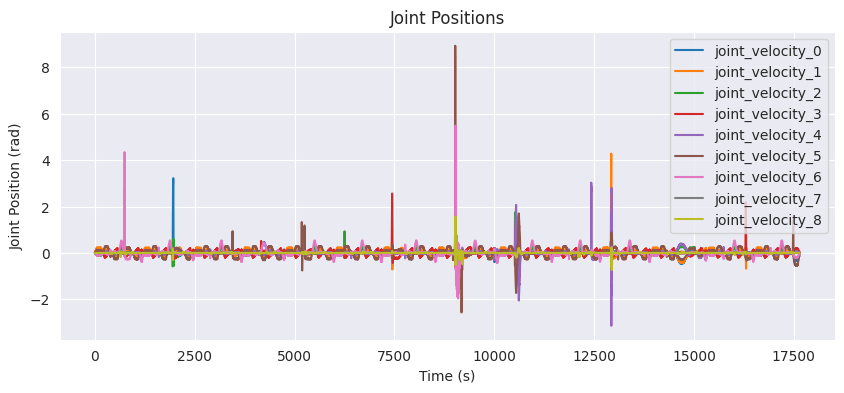

In [131]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 4))
plt.plot(df_st1[velcols])
plt.legend(velcols)
plt.xlabel('Time (s)')
plt.ylabel('Joint Position (rad)')
plt.title('Joint Positions')
plt.show()

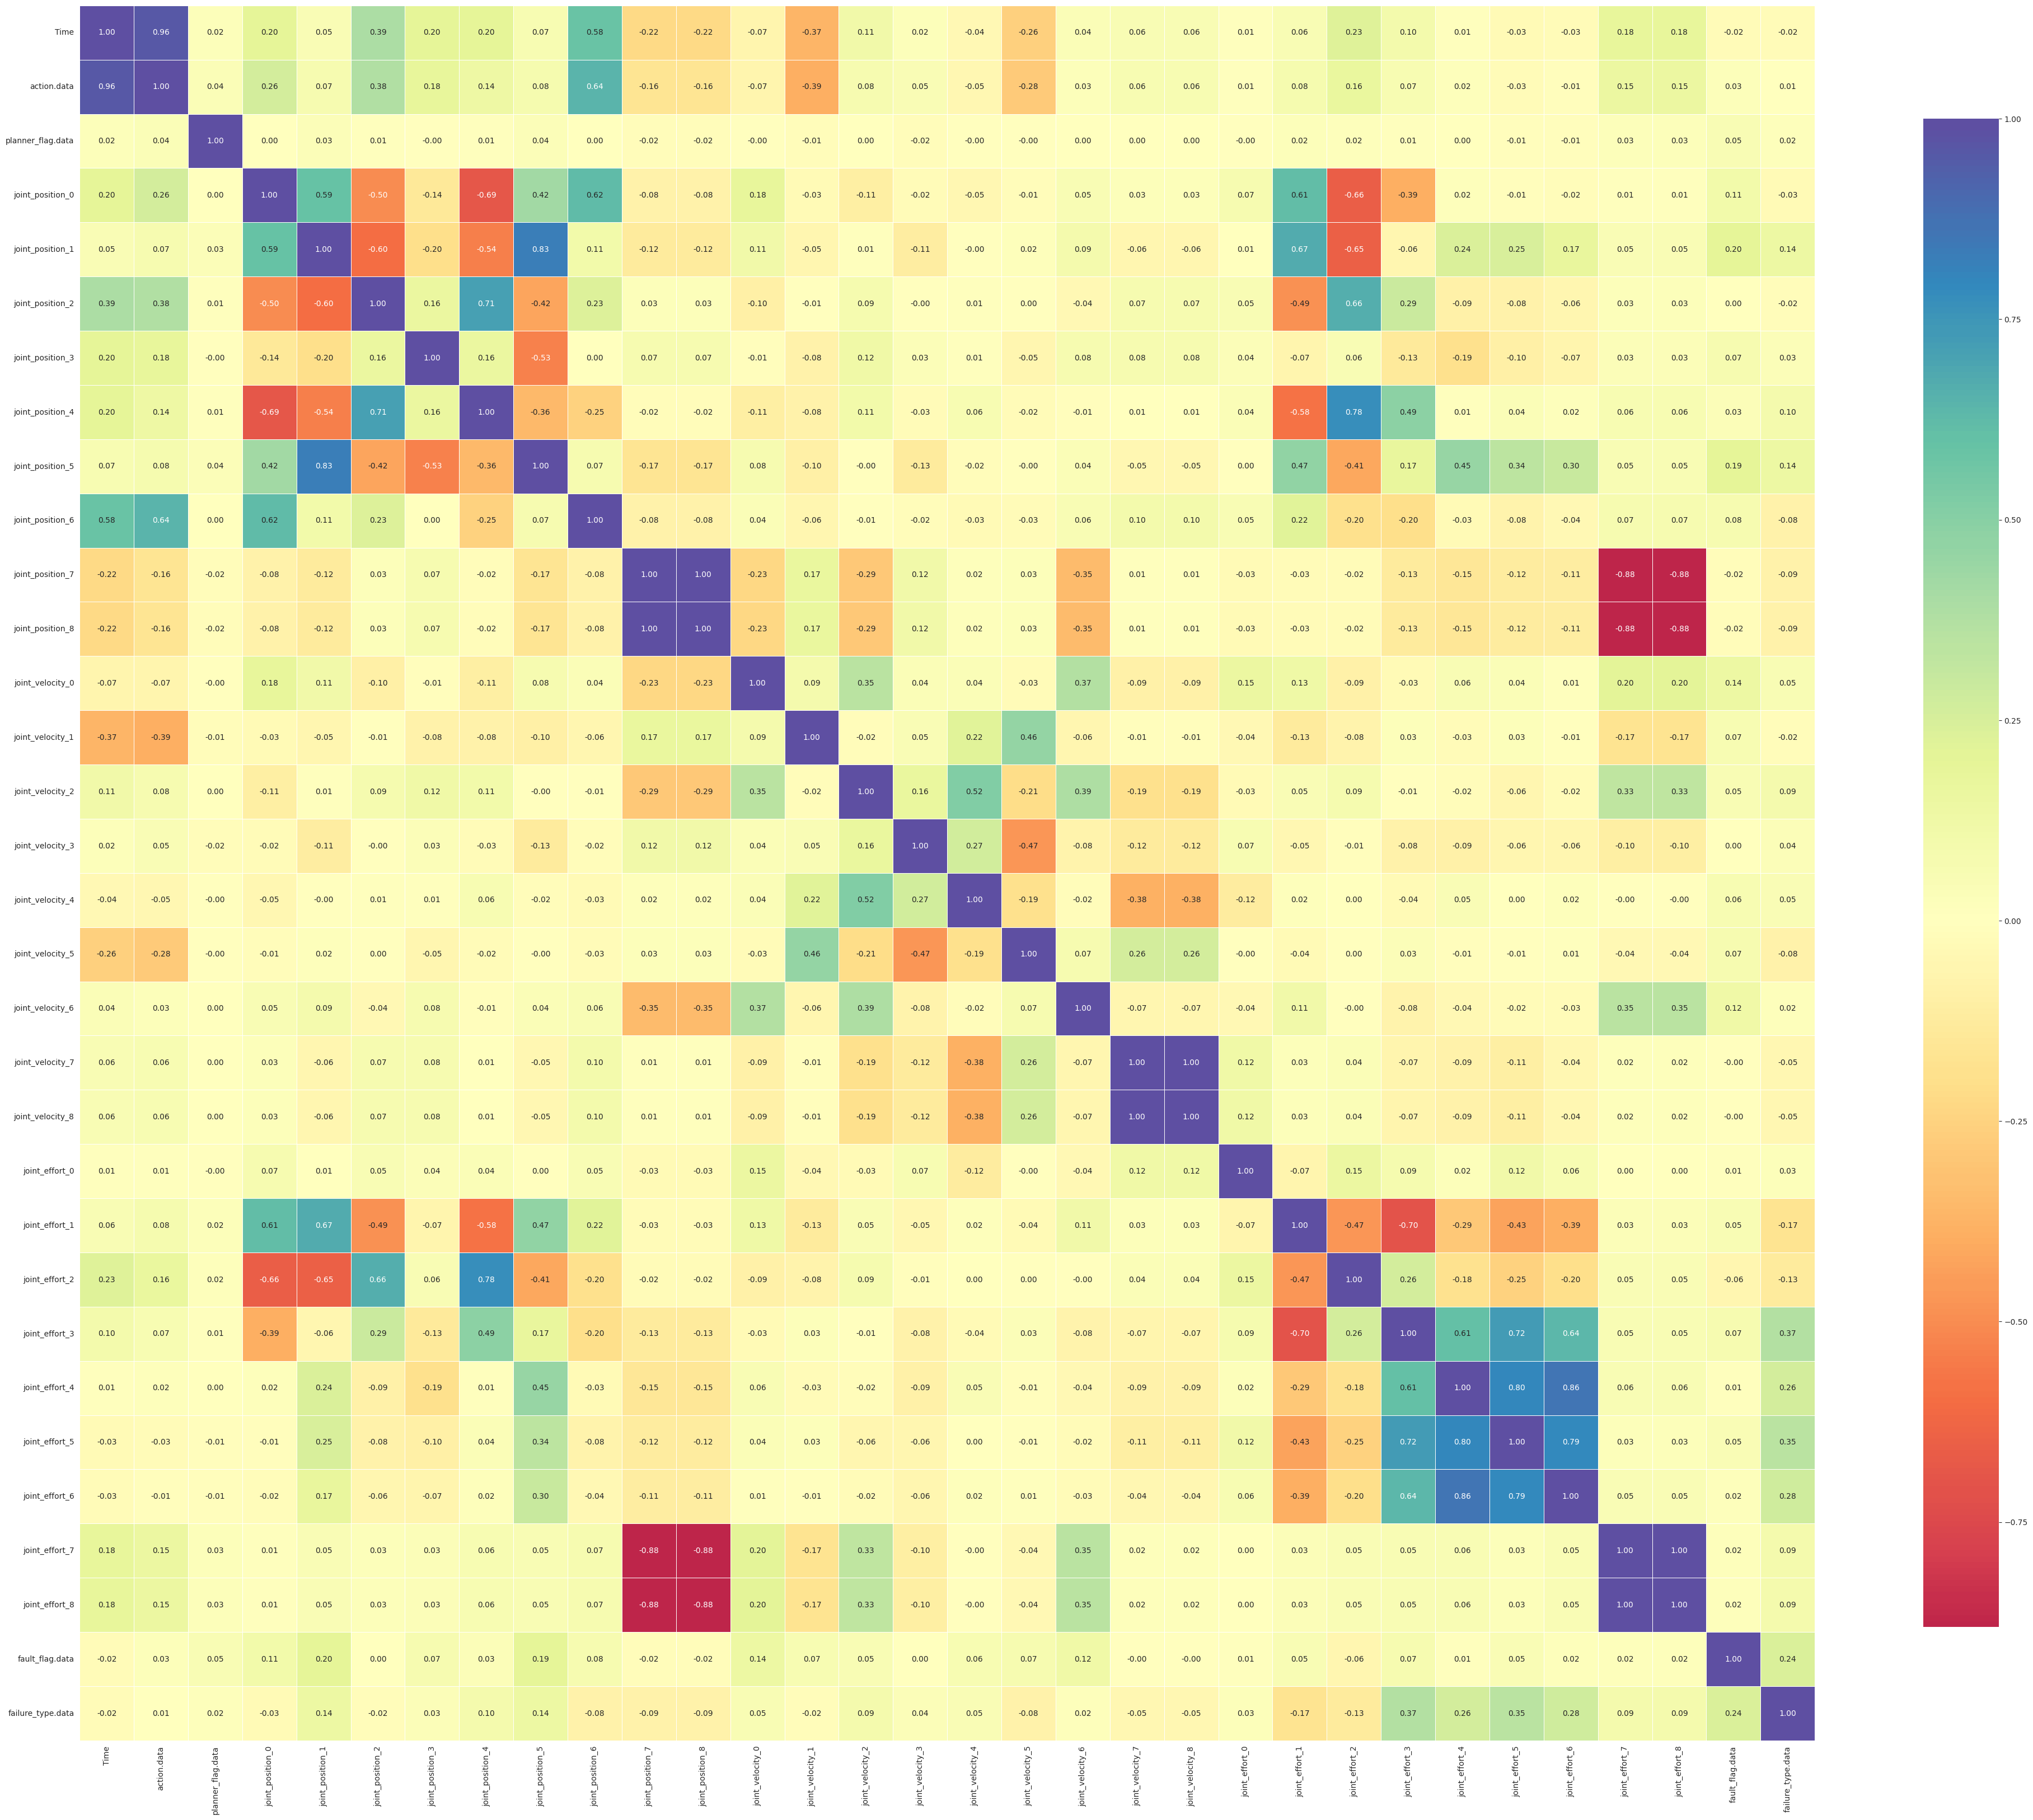

In [132]:
# function to plot correlation heatmap
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(50, 50))
    sns.heatmap(
        correlations,
        vmax=1.0,
        center=0,
        fmt=".2f",
        square=True,
        linewidths=0.5,
        annot=True,
        cbar_kws={"shrink": 0.70},
        cmap="Spectral",
    )
    plt.show()


correlation_heatmap(df_st1)


/home/simha/miniconda3/envs/dl/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


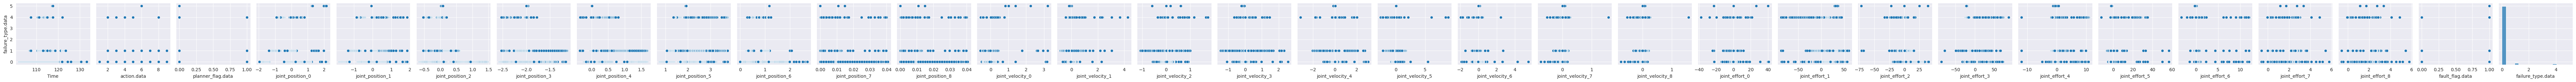

In [133]:
sns.pairplot(data=df_st1, y_vars=['failure_type.data'])